In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
%matplotlib inline

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats

plt.rc('figure', figsize=(16,12))
plt.rc('font', size=13)

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)
print("Seaborn Version: " + sns.__version__)

Pandas Version: 1.2.0
Numpy Version: 1.18.5
Seaborn Version: 0.11.1


In [5]:
trips = pd.read_csv("../data/clean/trips.csv", parse_dates=["date_from", "date_until"])
trips.sample(3)

bike_id                                   user_id  \
7608671   109418  4E42DDC2324FEBD6FE28DEF4FFF28E232B30521B   
6648627   107683  A8A5796A79D94504893B97B3F700239C326989BB   
4956788   120509  F0E3931D459CBD557F15D28CA9E035F037D868EF   

                  date_from          date_until          start_station_name  \
7608671 2017-05-09 18:54:42 2017-05-09 19:00:07             U-Bahn Baumwall   
6648627 2016-11-19 13:29:01 2016-11-19 13:36:54    Alter Wall/Adolphsbrücke   
4956788 2016-05-10 15:25:31 2016-05-10 15:53:14  Osterstraße/Bismarckstraße   

         start_station_id               end_station_name  end_station_id  \
7608671            214170  Am Kaiserkai/Großer Grasbrook          193238   
6648627            158204          Großneumarkt/Thielbek          213277   
4956788            131642    Fischersallee/Bleickenallee          211711   

         booked_via  duration_in_min  distance_in_km  
7608671  iPhone SRH                6        0.838104  
6648627  iPhone SRH                8        0.645593  
4956788  iPhone SRH               28        3.631352

In [16]:
tmp = trips.groupby(
    [trips.date_from.dt.year, trips.date_from.dt.month, trips.date_from.dt.day]
).size()

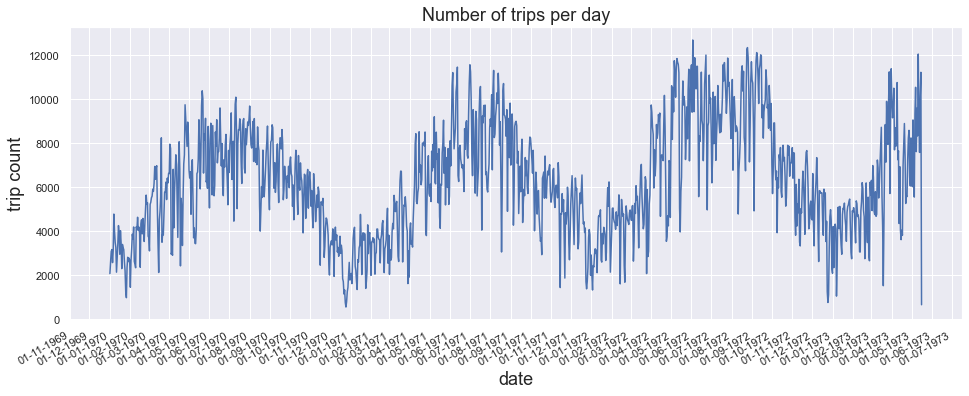

In [17]:
ax = tmp.plot(
    figsize=(16,6),
    fontsize=11,
    legend=False,
    title='Number of trips per day',
    x='date_from',
    y='count',
    xlabel='date',
    ylabel='trip count',
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()

plt.show()

In [23]:
# Since months vary in length it would be better to plot the mean amount of trips per month: 
# https://otexts.com/fpp3/transformations.html

x = trips[['date_from']].copy()
#x['date_from'] = pd.to_datetime(x['date_from'])

daily = x.groupby(pd.Grouper(key='date_from', freq='D')).size().reset_index(name='count')
monthly = daily.groupby(pd.Grouper(key='date_from', freq='M')).mean()

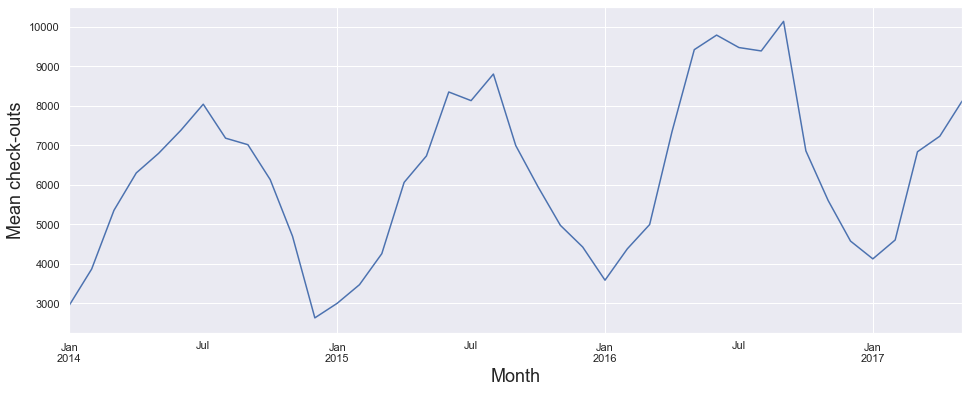

In [70]:
monthly.plot(
    figsize=(16,6),
    fontsize=11,
    legend=False,
    #title='Mean number of trips per month',
    xlabel='Month',
    ylabel='Mean check-outs',
)

plt.savefig("figures/mean_trips_per_month.png", bbox_inches="tight")
plt.show()

In [ ]:
seasonal_decompose(monthly, model='additive').plot()

In [ ]:
STL(monthly, seasonal=13).fit().plot()

In [ ]:
seasonal_decompose(tmp[['datetime', 'count']].set_index('datetime'), model='additive').plot()

In [ ]:
STL(tmp[['datetime', 'count']].set_index('datetime'), seasonal=13).fit().plot()

In [25]:
x = trips[['date_from']].copy()
#x['date_from'] = pd.to_datetime(x['date_from'])

daily = x.groupby(pd.Grouper(key='date_from', freq='D')).size().reset_index(name='count')
weekly = daily.groupby(pd.Grouper(key='date_from', freq='W')).mean()

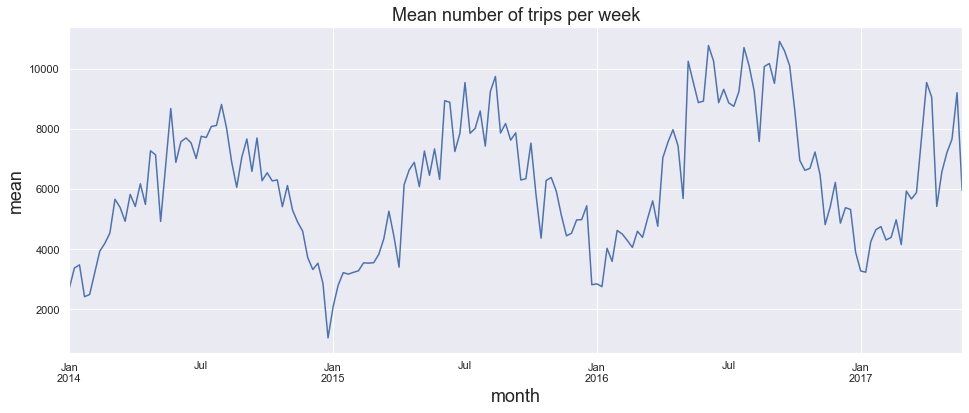

In [41]:
weekly.plot(
    figsize=(16,6),
    fontsize=11,
    legend=False,
    title='Mean number of trips per week',
    xlabel='month',
    ylabel='mean',
)
plt.savefig("figures/mean_trips_per_week.png", bbox_inches="tight")
plt.show()

In [ ]:
seasonal_decompose(weekly, model='additive').plot()

In [ ]:
STL(weekly, seasonal=13).fit().plot()

In [ ]:
tmp['boxcox'] = stats.boxcox(x=tmp['count'], lmbda=None)[0]

ax = tmp.plot(
    figsize=(16,6),
    fontsize=11,
    legend=False,
    title='Number of trips per day',
    x='datetime',
    y='boxcox',
    xlabel='date',
    ylabel='trip count',
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()

plt.show()

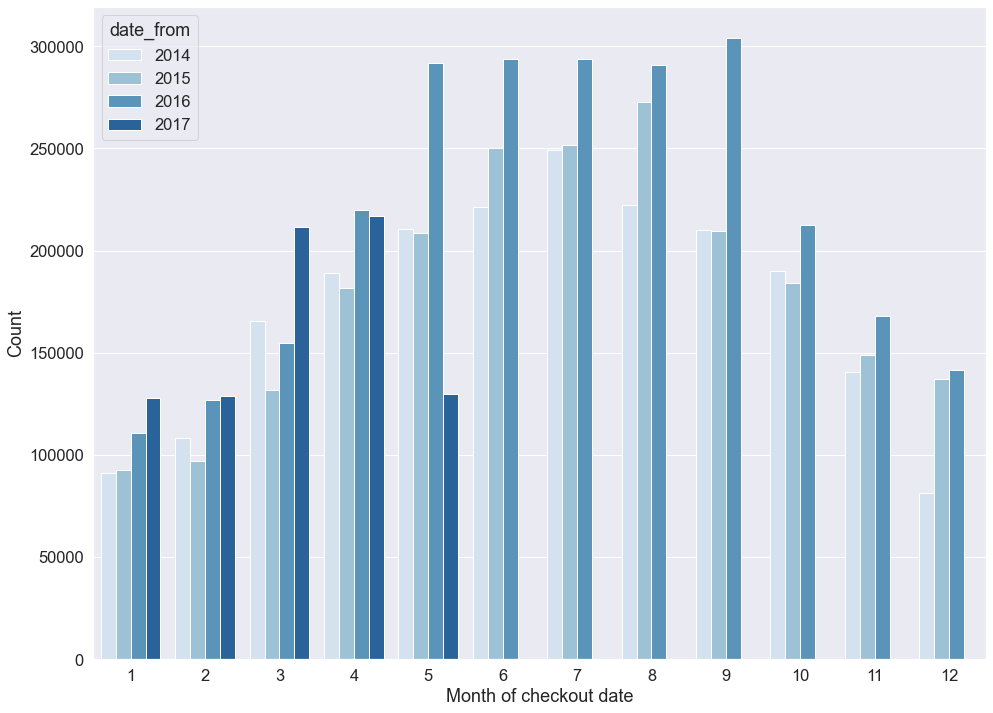

In [69]:
#plt.figure(figsize=(13, 10))
ax = sns.countplot(
    x=x.date_from.dt.month, 
    hue=x.date_from.dt.year, 
    data=trips, 
    palette="Blues"
)
ax.set(xlabel="Month of checkout date", ylabel="Count")
plt.savefig("figures/count_trips_per_month.png", bbox_inches="tight")
plt.show()

* seasonal changes at the interval of a year (OR: not necessarily bound to time, but rather to temperature)
* slight upwards trend

In [33]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669950 entries, 0 to 7669949
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   bike_id             int64         
 1   user_id             object        
 2   date_from           datetime64[ns]
 3   date_until          datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    int64         
 6   end_station_name    object        
 7   end_station_id      int64         
 8   booked_via          object        
 9   duration_in_min     int64         
 10  distance_in_km      float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 643.7+ MB


In [55]:
group = trips.groupby([trips.date_from.dt.year, trips.date_from.dt.month])

In [59]:
tmp = pd.DataFrame(group.start_station_name.nunique()).unstack()
tmp

start_station_name                                                   \
date_from                 1      2      3      4      5      6      7      8    
date_from                                                                       
2014                   129.0  129.0  130.0  130.0  130.0  130.0  130.0  130.0   
2015                   132.0  133.0  133.0  148.0  151.0  164.0  164.0  166.0   
2016                   187.0  189.0  190.0  194.0  203.0  203.0  203.0  203.0   
2017                   205.0  206.0  206.0  207.0  206.0    NaN    NaN    NaN   

                                       
date_from     9      10     11     12  
date_from                              
2014       130.0  131.0  131.0  132.0  
2015       169.0  172.0  172.0  180.0  
2016       203.0  206.0  206.0  206.0  
2017         NaN    NaN    NaN    NaN

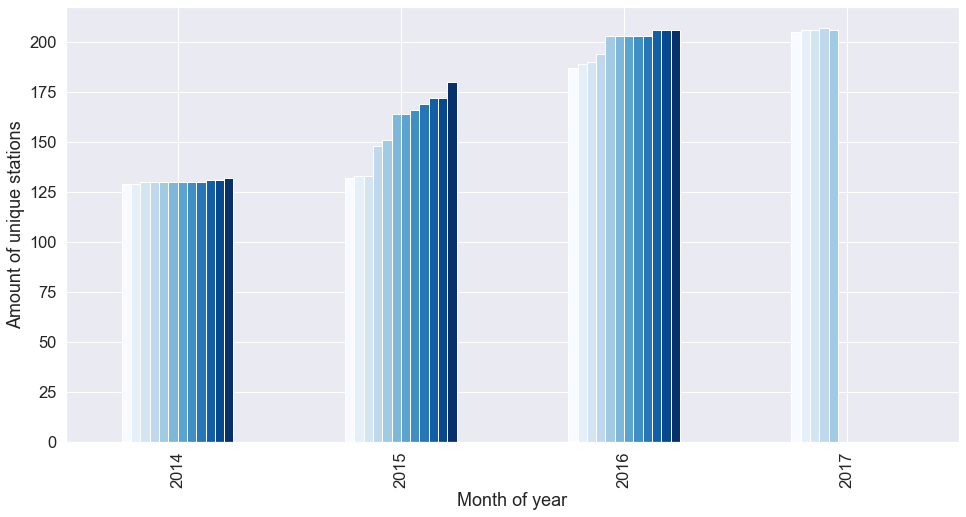

In [60]:
tmp.plot(kind='bar', figsize=(16,8), legend=False, cmap='Blues')
#plt.title('Number of unique stations per month per year')
plt.xlabel('Month of year')
plt.ylabel('Amount of unique stations')
plt.savefig("figures/count_unique_stations_per_months.png", bbox_inches="tight")
plt.show()

In [61]:
tmp = pd.DataFrame(group.user_id.nunique()).unstack()
tmp

user_id                                                        \
date_from       1        2        3        4        5        6        7    
date_from                                                                  
2014       19824.0  23118.0  33102.0  37153.0  41063.0  42422.0  45749.0   
2015       20891.0  22225.0  28519.0  37730.0  41604.0  46359.0  48512.0   
2016       24444.0  26811.0  32322.0  43247.0  54132.0  53250.0  55190.0   
2017       27615.0  28000.0  42425.0  45654.0  35237.0      NaN      NaN   

                                                        
date_from       8        9        10       11       12  
date_from                                               
2014       43548.0  41299.0  38408.0  30139.0  20924.0  
2015       51438.0  42549.0  38534.0  31352.0  30706.0  
2016       54575.0  56033.0  43564.0  34525.0  32210.0  
2017           NaN      NaN      NaN      NaN      NaN

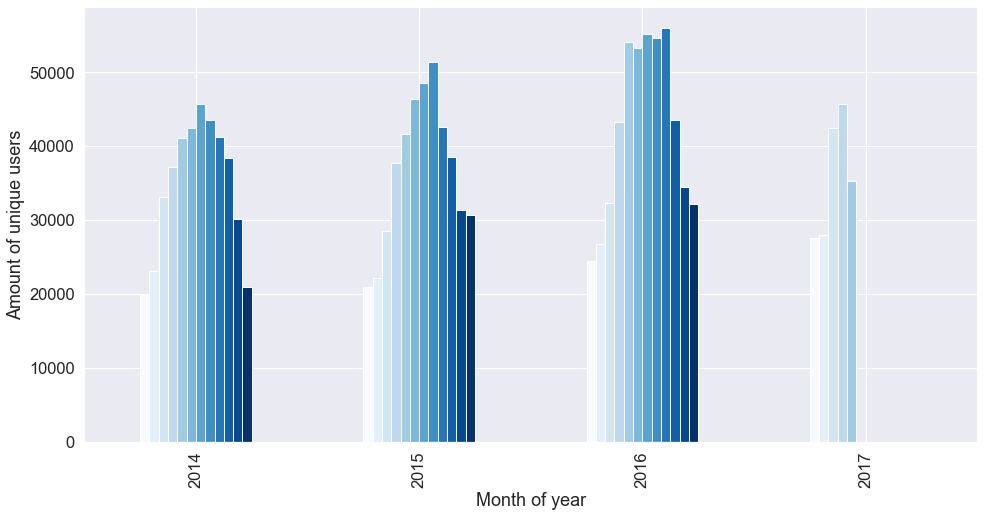

In [62]:
tmp.plot(kind='bar', figsize=(16,8), legend=False, cmap='Blues')
#plt.title('Number of unique user IDs per month per year')
plt.xlabel('Month of year')
plt.ylabel('Amount of unique users')
plt.savefig("figures/count_unique_users_per_months.png", bbox_inches="tight")
plt.show()

In [63]:
tmp = pd.DataFrame(group.bike_id.nunique()).unstack()
tmp

bike_id                                                          \
date_from      1       2       3       4       5       6       7       8    
date_from                                                                   
2014       1434.0  1584.0  1604.0  1600.0  1632.0  1518.0  1527.0  1471.0   
2015       1471.0  1478.0  1632.0  1595.0  1524.0  1792.0  1842.0  1771.0   
2016       1988.0  1913.0  1883.0  1946.0  1989.0  1988.0  2004.0  1965.0   
2017       2131.0  2109.0  2417.0  2505.0  2378.0     NaN     NaN     NaN   

                                           
date_from      9       10      11      12  
date_from                                  
2014       1454.0  1381.0  1336.0  1386.0  
2015       1761.0  1793.0  1831.0  1932.0  
2016       1962.0  2085.0  2178.0  2147.0  
2017          NaN     NaN     NaN     NaN

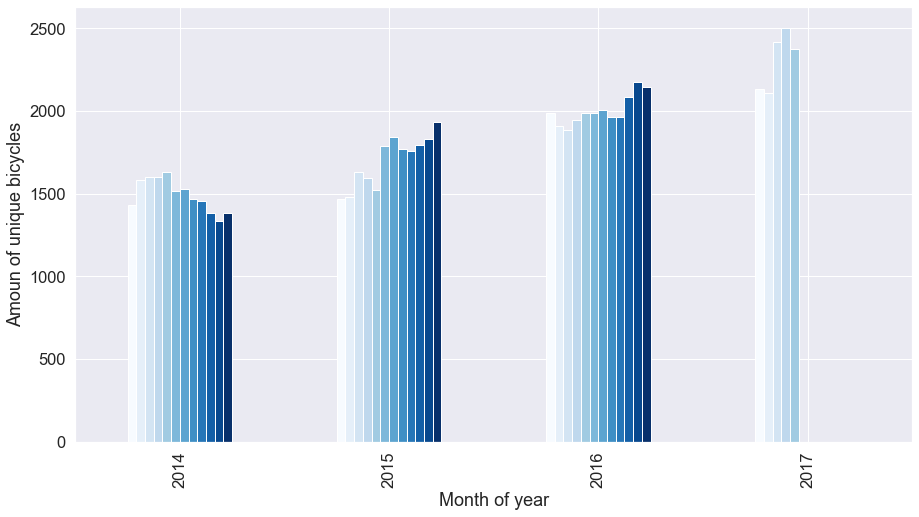

In [64]:
tmp.plot(kind='bar', figsize=(15,8), legend=False, cmap='Blues')
#plt.title('Number of unique bike IDs per month per year')
plt.xlabel('Month of year')
plt.ylabel('Amoun of unique bicycles')
plt.savefig("figures/count_unique_bikes_per_months.png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='duration_in_min', ylabel='Count'>

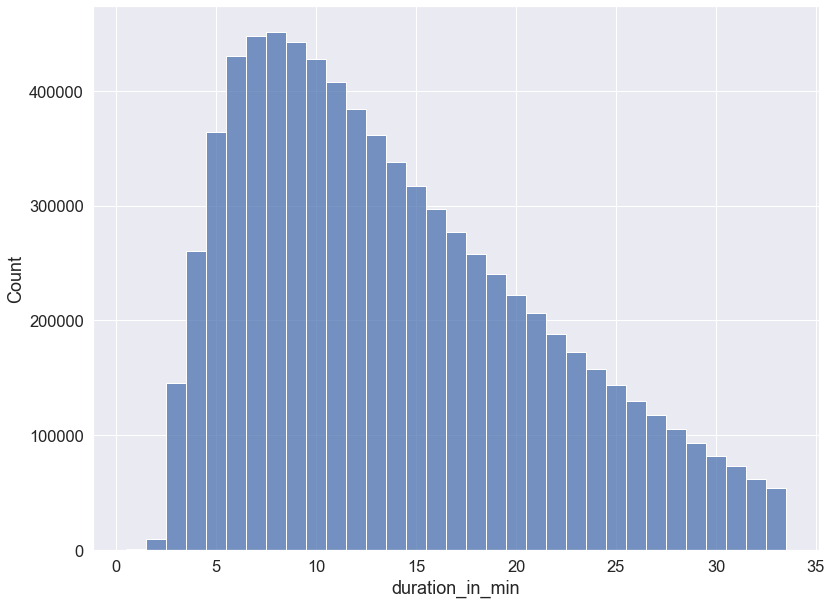

In [40]:
plt.figure(figsize=(13, 10))
sns.histplot(trips['duration_in_min'], discrete=True)

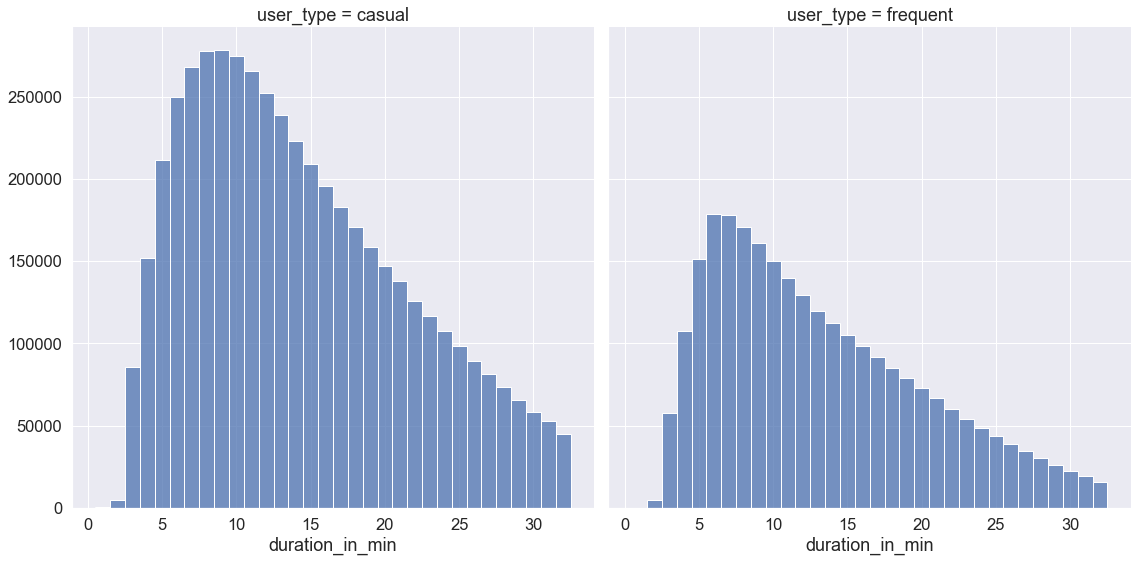

In [28]:
g = sns.FacetGrid(all_trips, col='user_type', height=8)
g.map(sns.histplot, 'duration_in_min', discrete=True)
g.savefig('figures/test.png')

<AxesSubplot:xlabel='from_month', ylabel='count'>

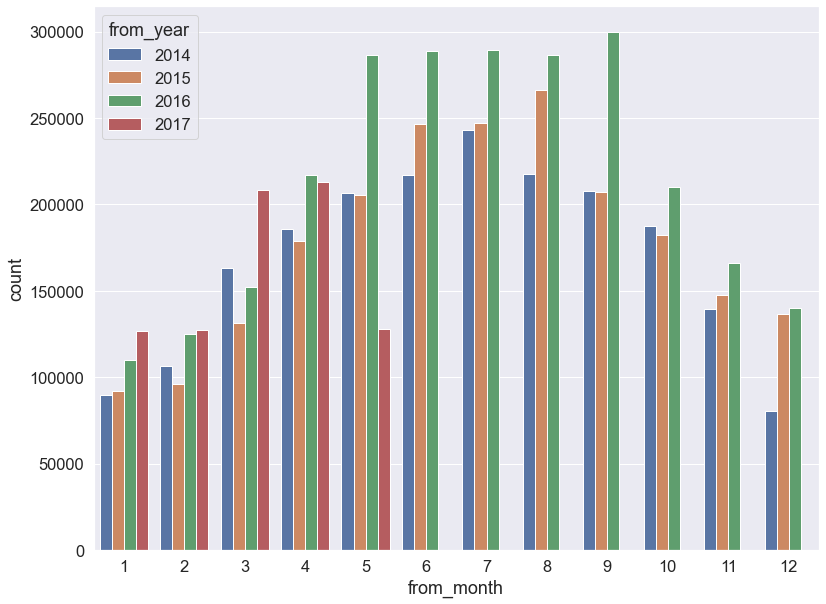

In [29]:
plt.figure(figsize=(13, 10))
sns.countplot(x='from_month', hue='from_year', data=all_trips)

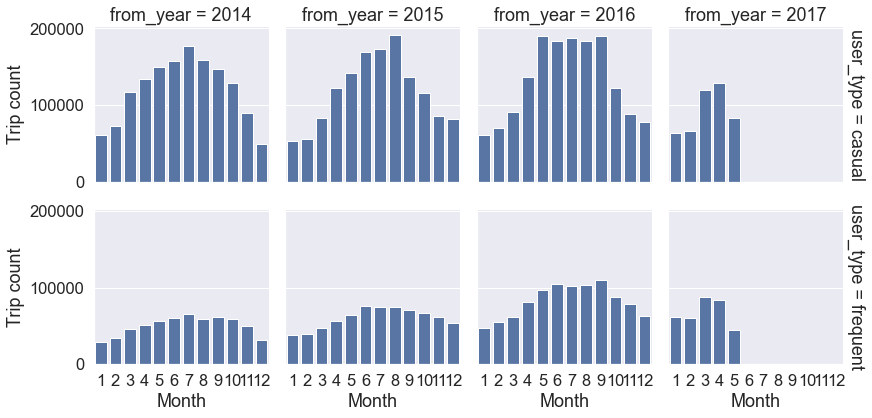

In [30]:
g = sns.FacetGrid(all_trips, col='from_year', row='user_type', margin_titles=True)
g.map(sns.countplot, 'from_month', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
g.set_axis_labels('Month', 'Trip count')

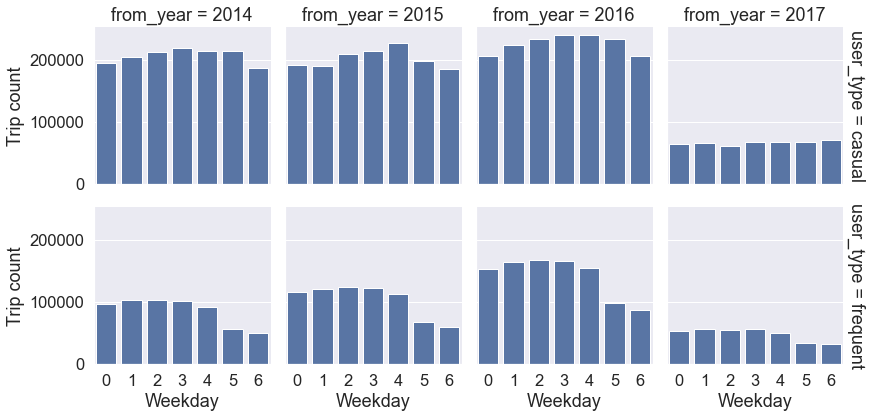

In [31]:
g = sns.FacetGrid(all_trips, col='from_year', row='user_type', margin_titles=True)
g.map(sns.countplot, 'from_weekday', order=[0, 1, 2, 3, 4, 5, 6])
g.set_axis_labels('Weekday', 'Trip count')

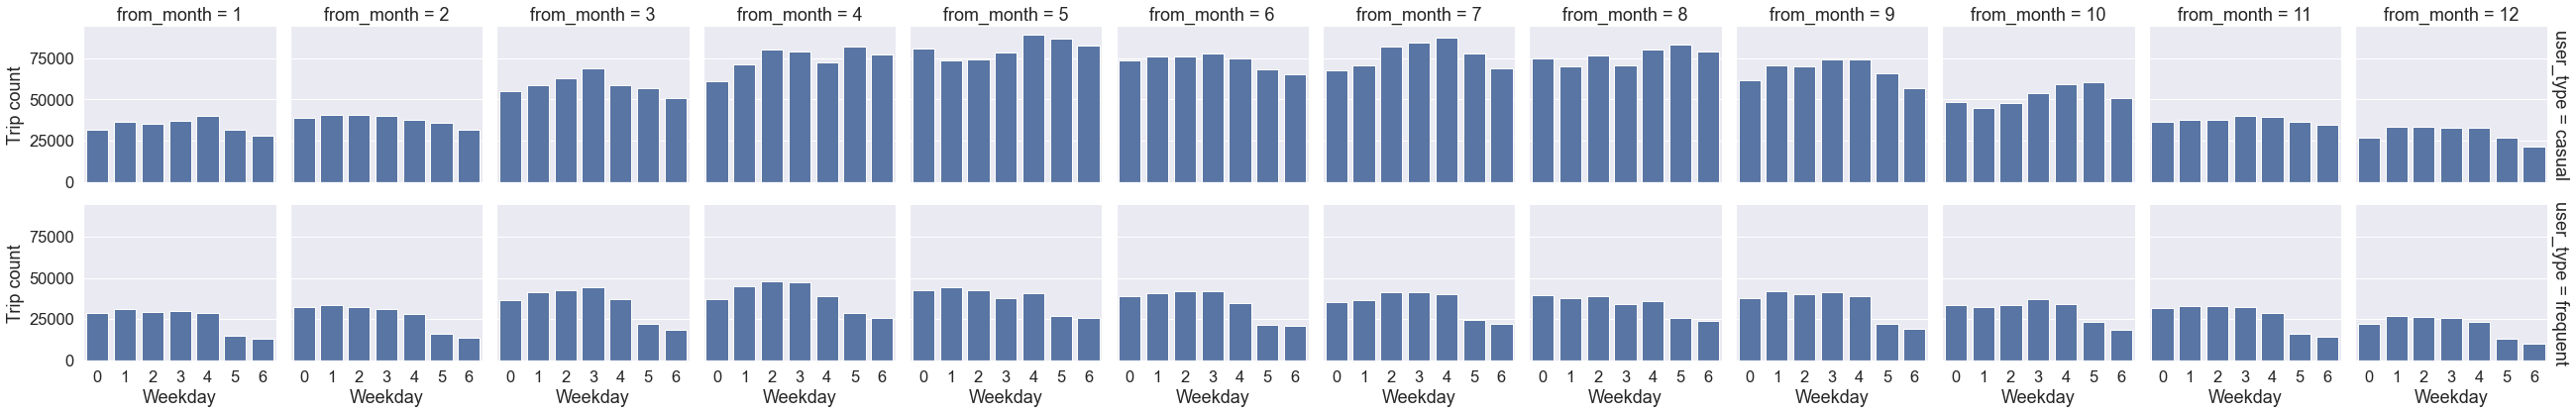

In [32]:
g = sns.FacetGrid(all_trips, col='from_month', row='user_type', margin_titles=True)
g.map(sns.countplot, 'from_weekday', order=[*range(0, 7)])
g.set_axis_labels('Weekday', 'Trip count')

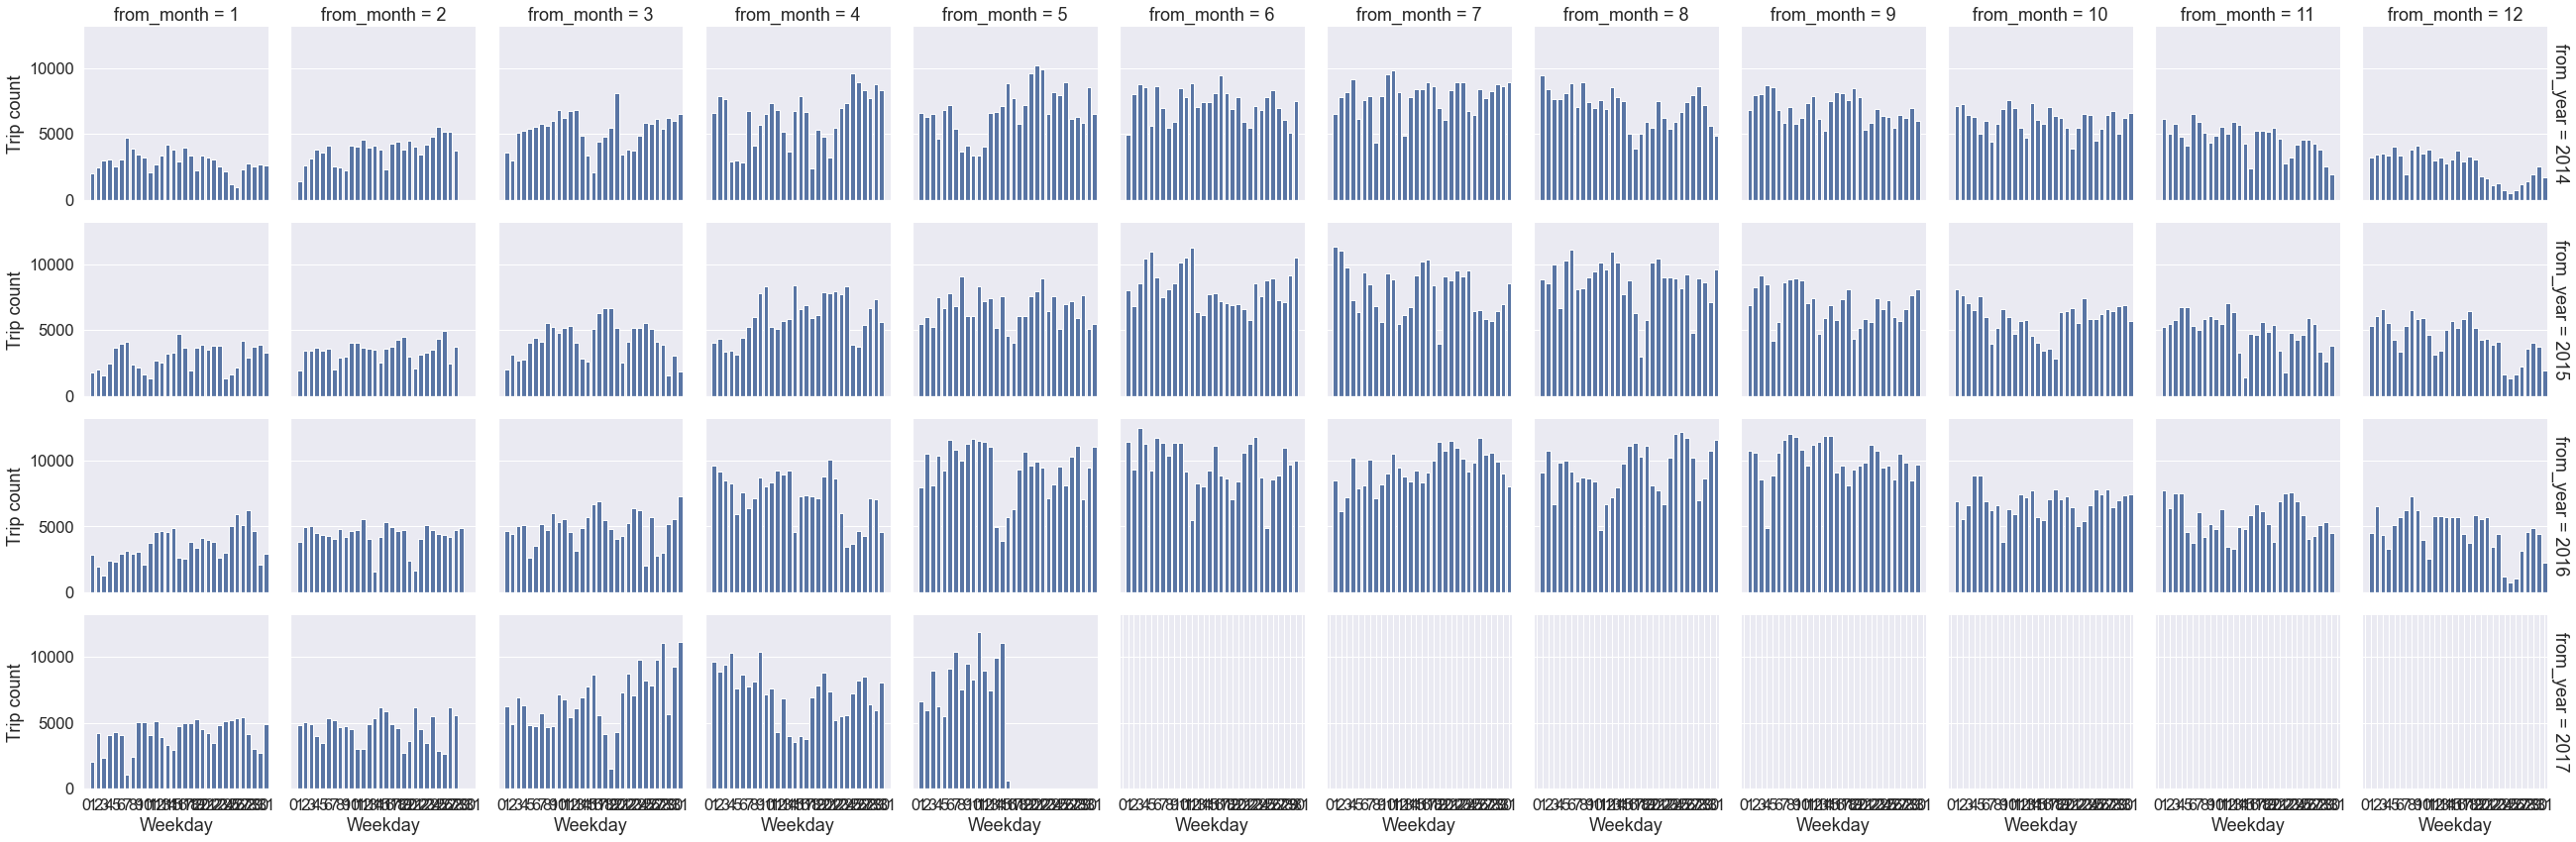

In [33]:
g = sns.FacetGrid(all_trips, col='from_month', row='from_year', margin_titles=True)
g.map(sns.countplot, 'from_day', order=[*range(0, 32)])
g.set_axis_labels('Weekday', 'Trip count')

In [34]:
frequent_user_trips.groupby('user_id').duration_in_min.mean().sort_values()

user_id
BA0F0355B29610D8806857AF5CAD29F39C353223     2.079086
6D5FF6524B026E21536A62EADDA8826487D42DBE     3.077108
023D4D25898703EF735B35EA1634B82404921EB1     3.194286
B4CC4C582D246B2716EA5DEDB42E62B7B1BC7A6C     3.259259
54E2F1D2842FE49C1D5BDB3A9CDD184D80F730A2     3.336735
                                              ...    
1DD19276449D25A9A5386D5F20207C9EB189C1C1    27.900000
9A99FDD8E3F27B38FEE326569F0D11261E0776B4    28.769029
42A40688783331241CD6F3A2803BD6C0756A80AF    29.086957
757F879FC96233AB1D27EF995F97AD67FDDDD400    29.379310
30AD45F743474BAC6C64B2B20D0F067D489C339B    30.200000
Name: duration_in_min, Length: 14305, dtype: float64

In [35]:
casual_user_trips.groupby('user_id').duration_in_min.mean().sort_values()

user_id
6DEA47A4C49ABB25ECB6B2E3DDAB31A95077F6E0     1.0
53372DA4C746CABA2206A0486709FBAC7B755FE1     1.0
0C0258118E445EE675EDEDA5E17B750DBE6C6FD1     1.0
92F0A80420D9DA7AFB199DDB1188C52DCAA3E31F     1.0
22BC0D4DBD4A130DCE9C0475A712A7CE7710C44B     1.0
                                            ... 
F7B7ED6C2F33E230DF124D59C861A0D0F51767F8    32.0
3AB1111470807F53A5372123E00B683C0798AC4F    32.0
18E3657F644FF28A5E557502F8C583142C4CB789    32.0
6502994114F5F409A577EF8A089961084B8C738E    32.0
F79293EA262249D5EE3C0AA04E30AFAC1EE86232    32.0
Name: duration_in_min, Length: 211140, dtype: float64

<AxesSubplot:>

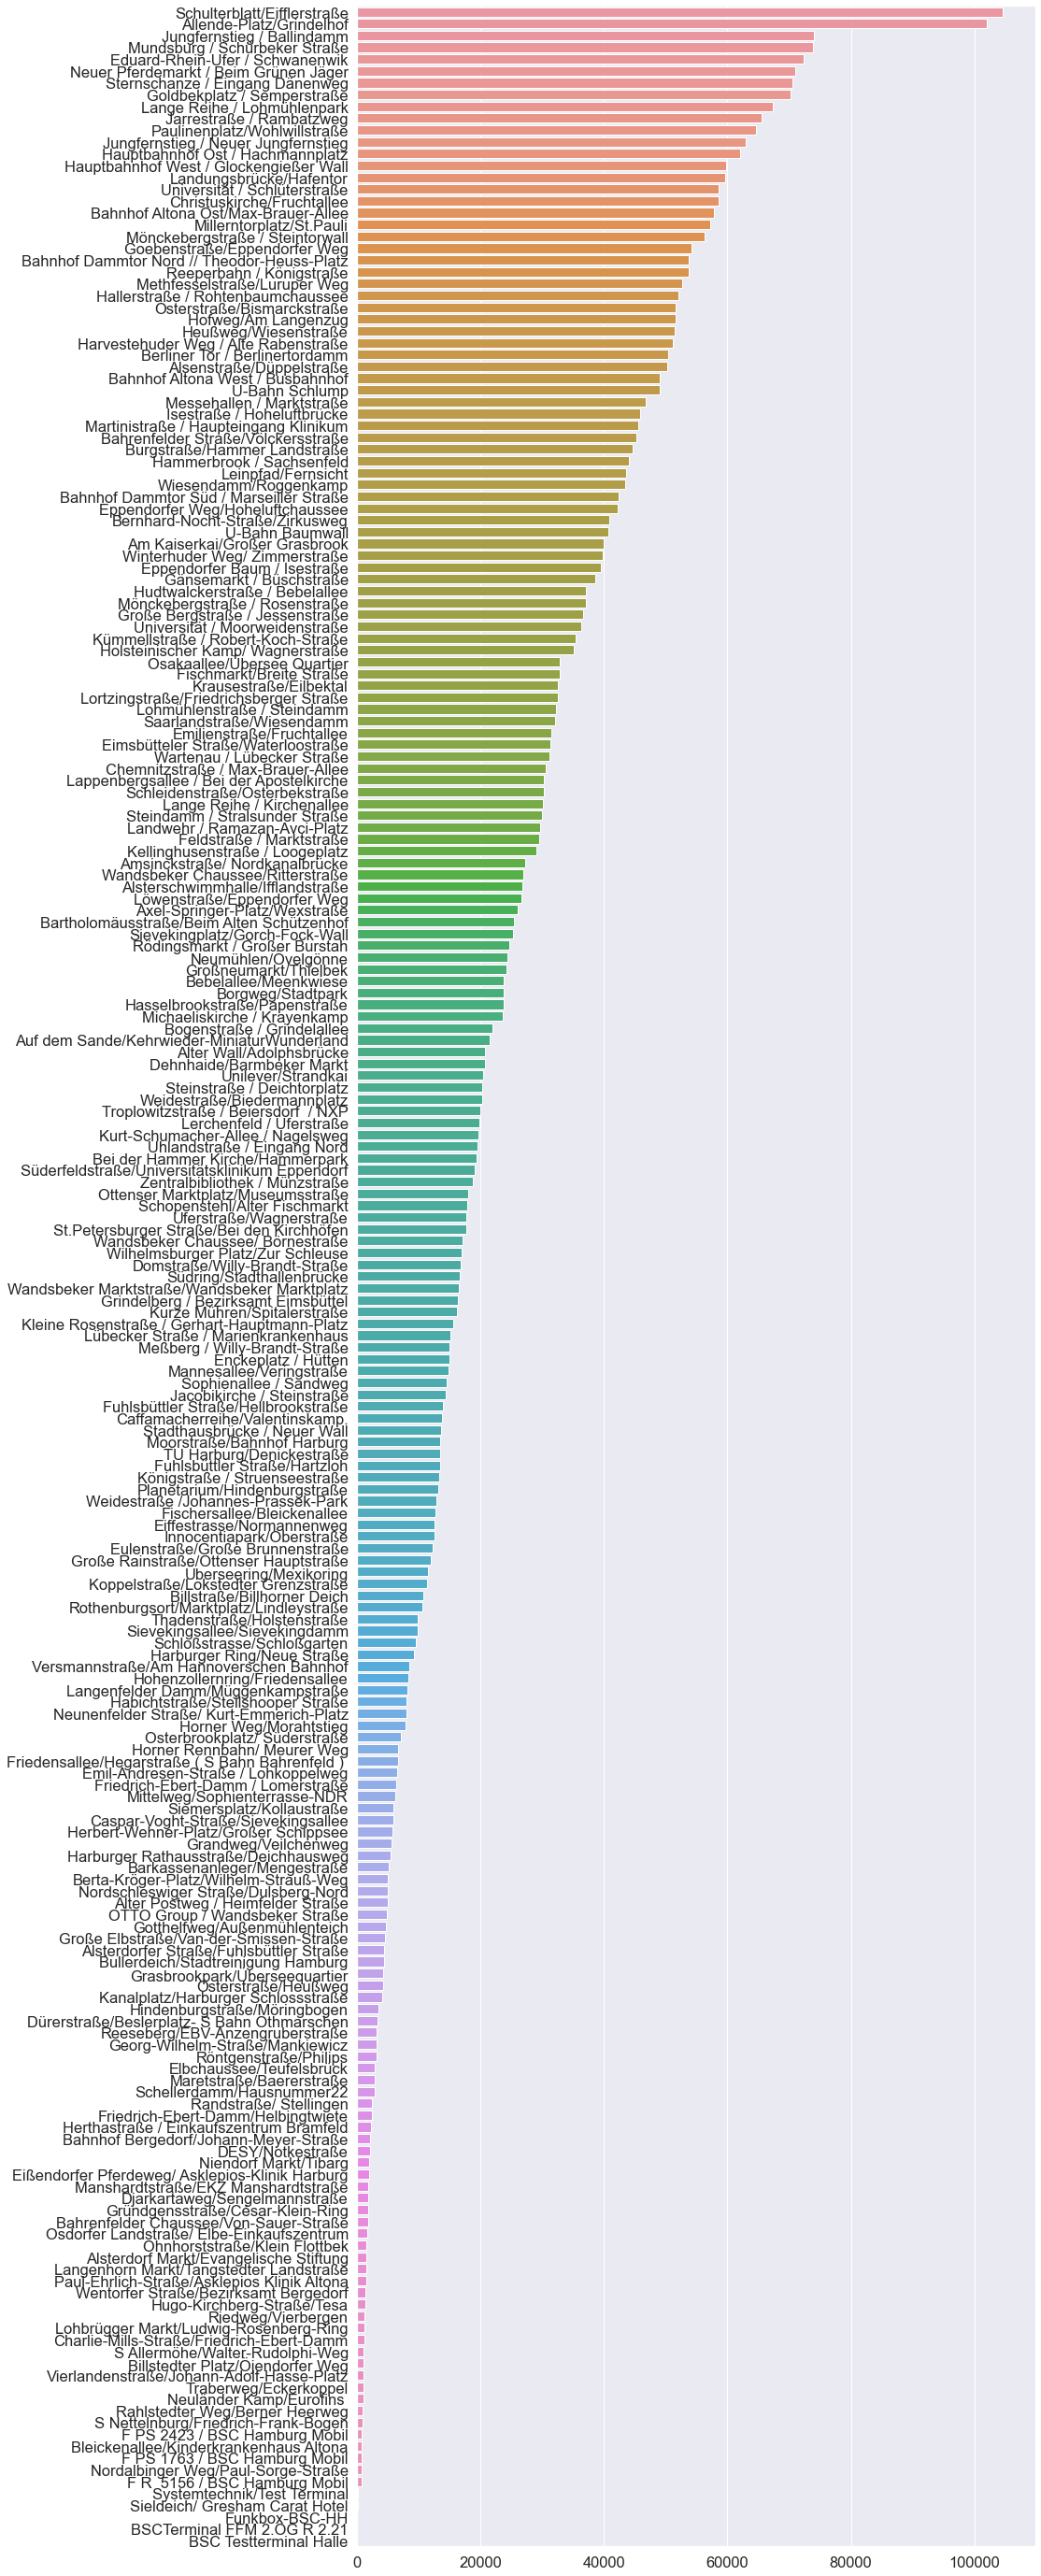

In [36]:
count = casual_user_trips['from_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

<AxesSubplot:>

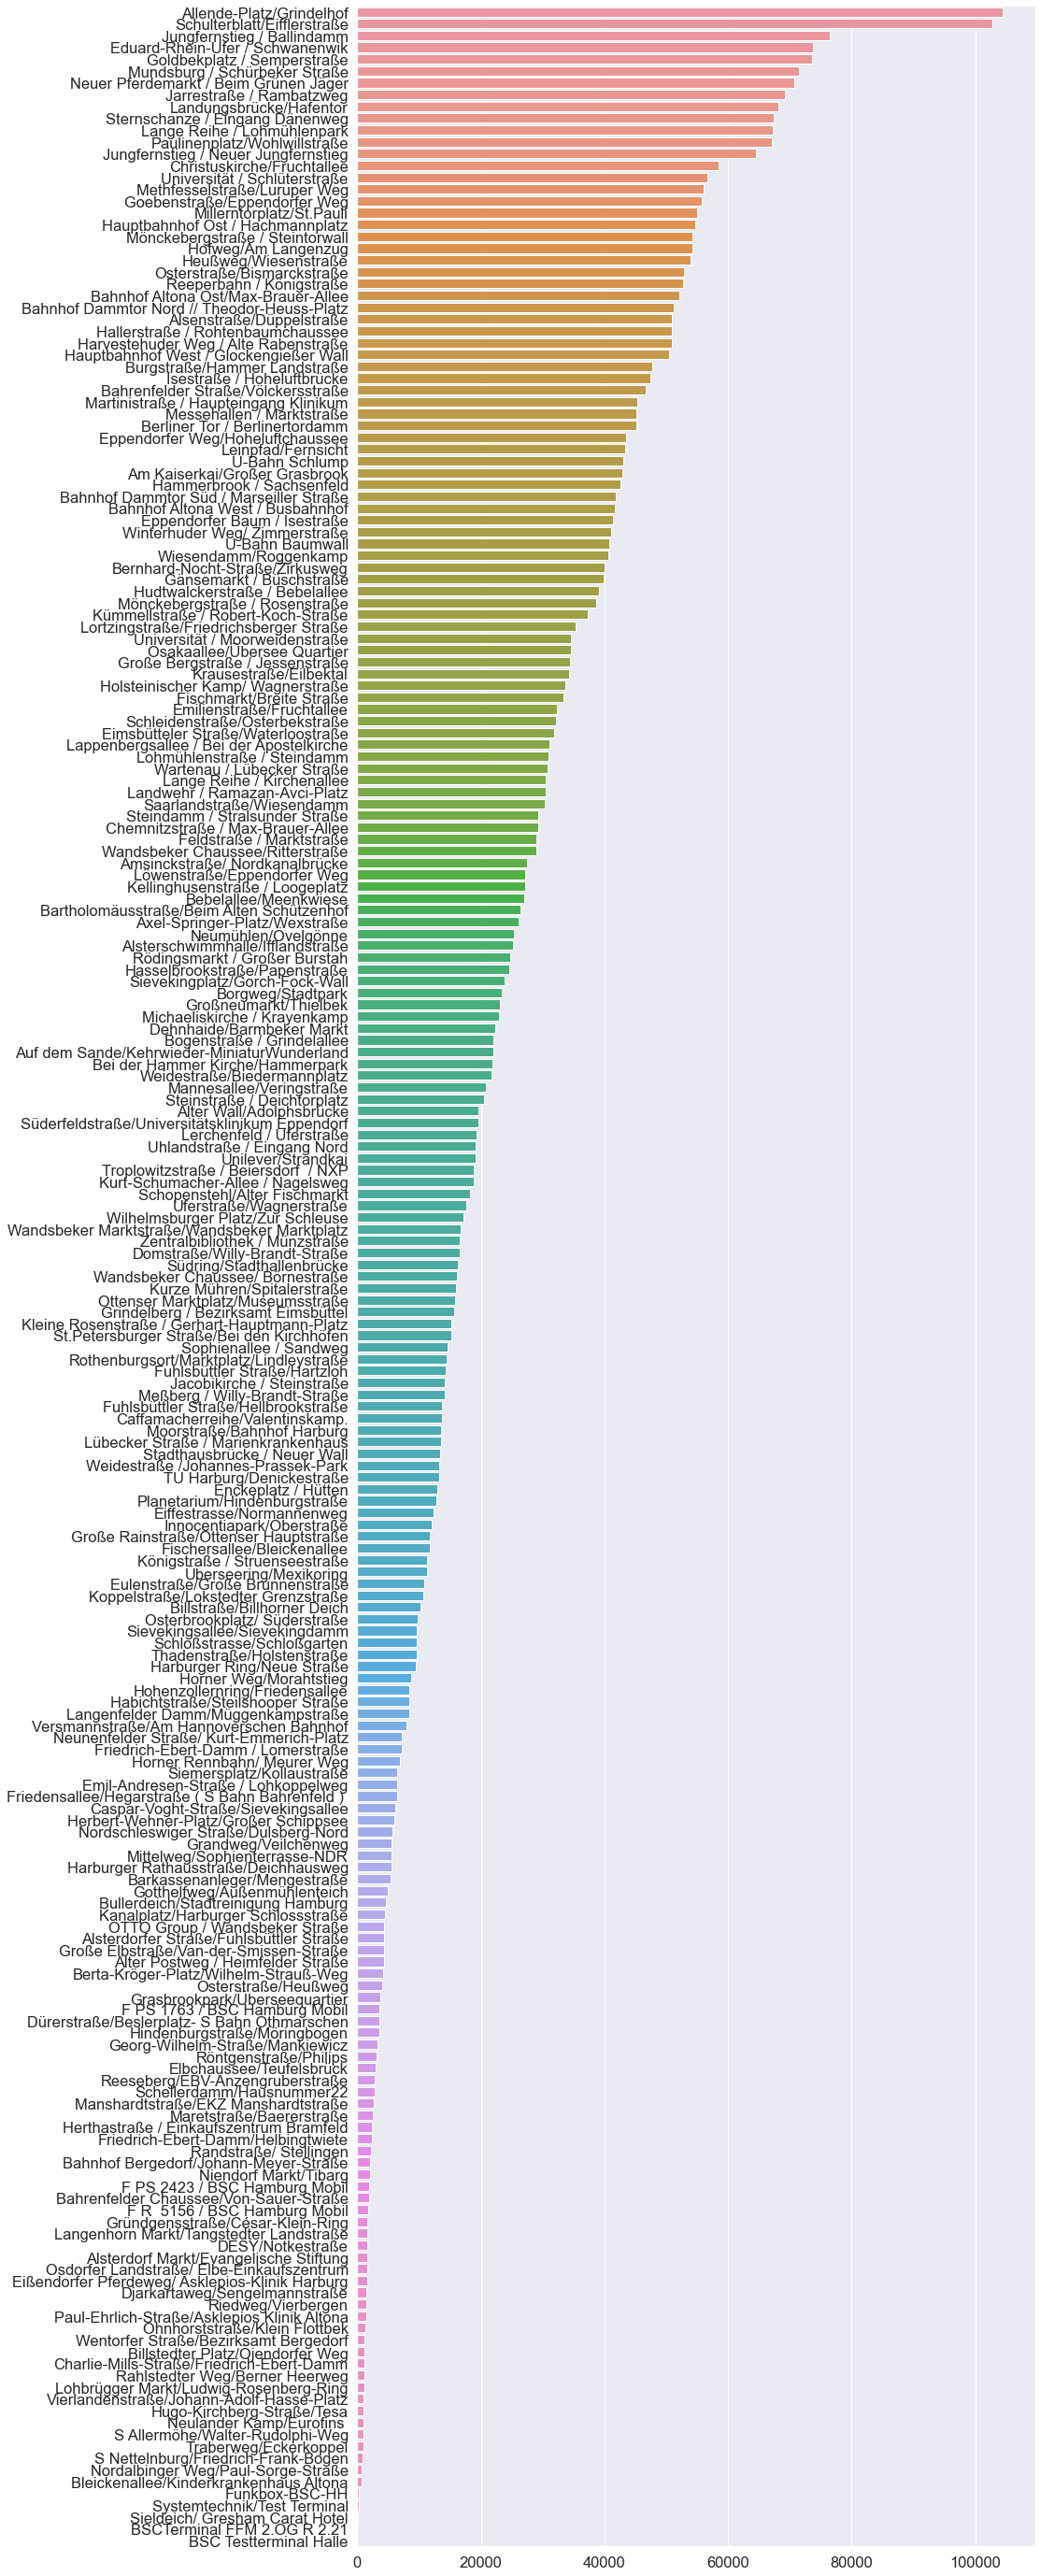

In [37]:
count = casual_user_trips['to_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

<AxesSubplot:>

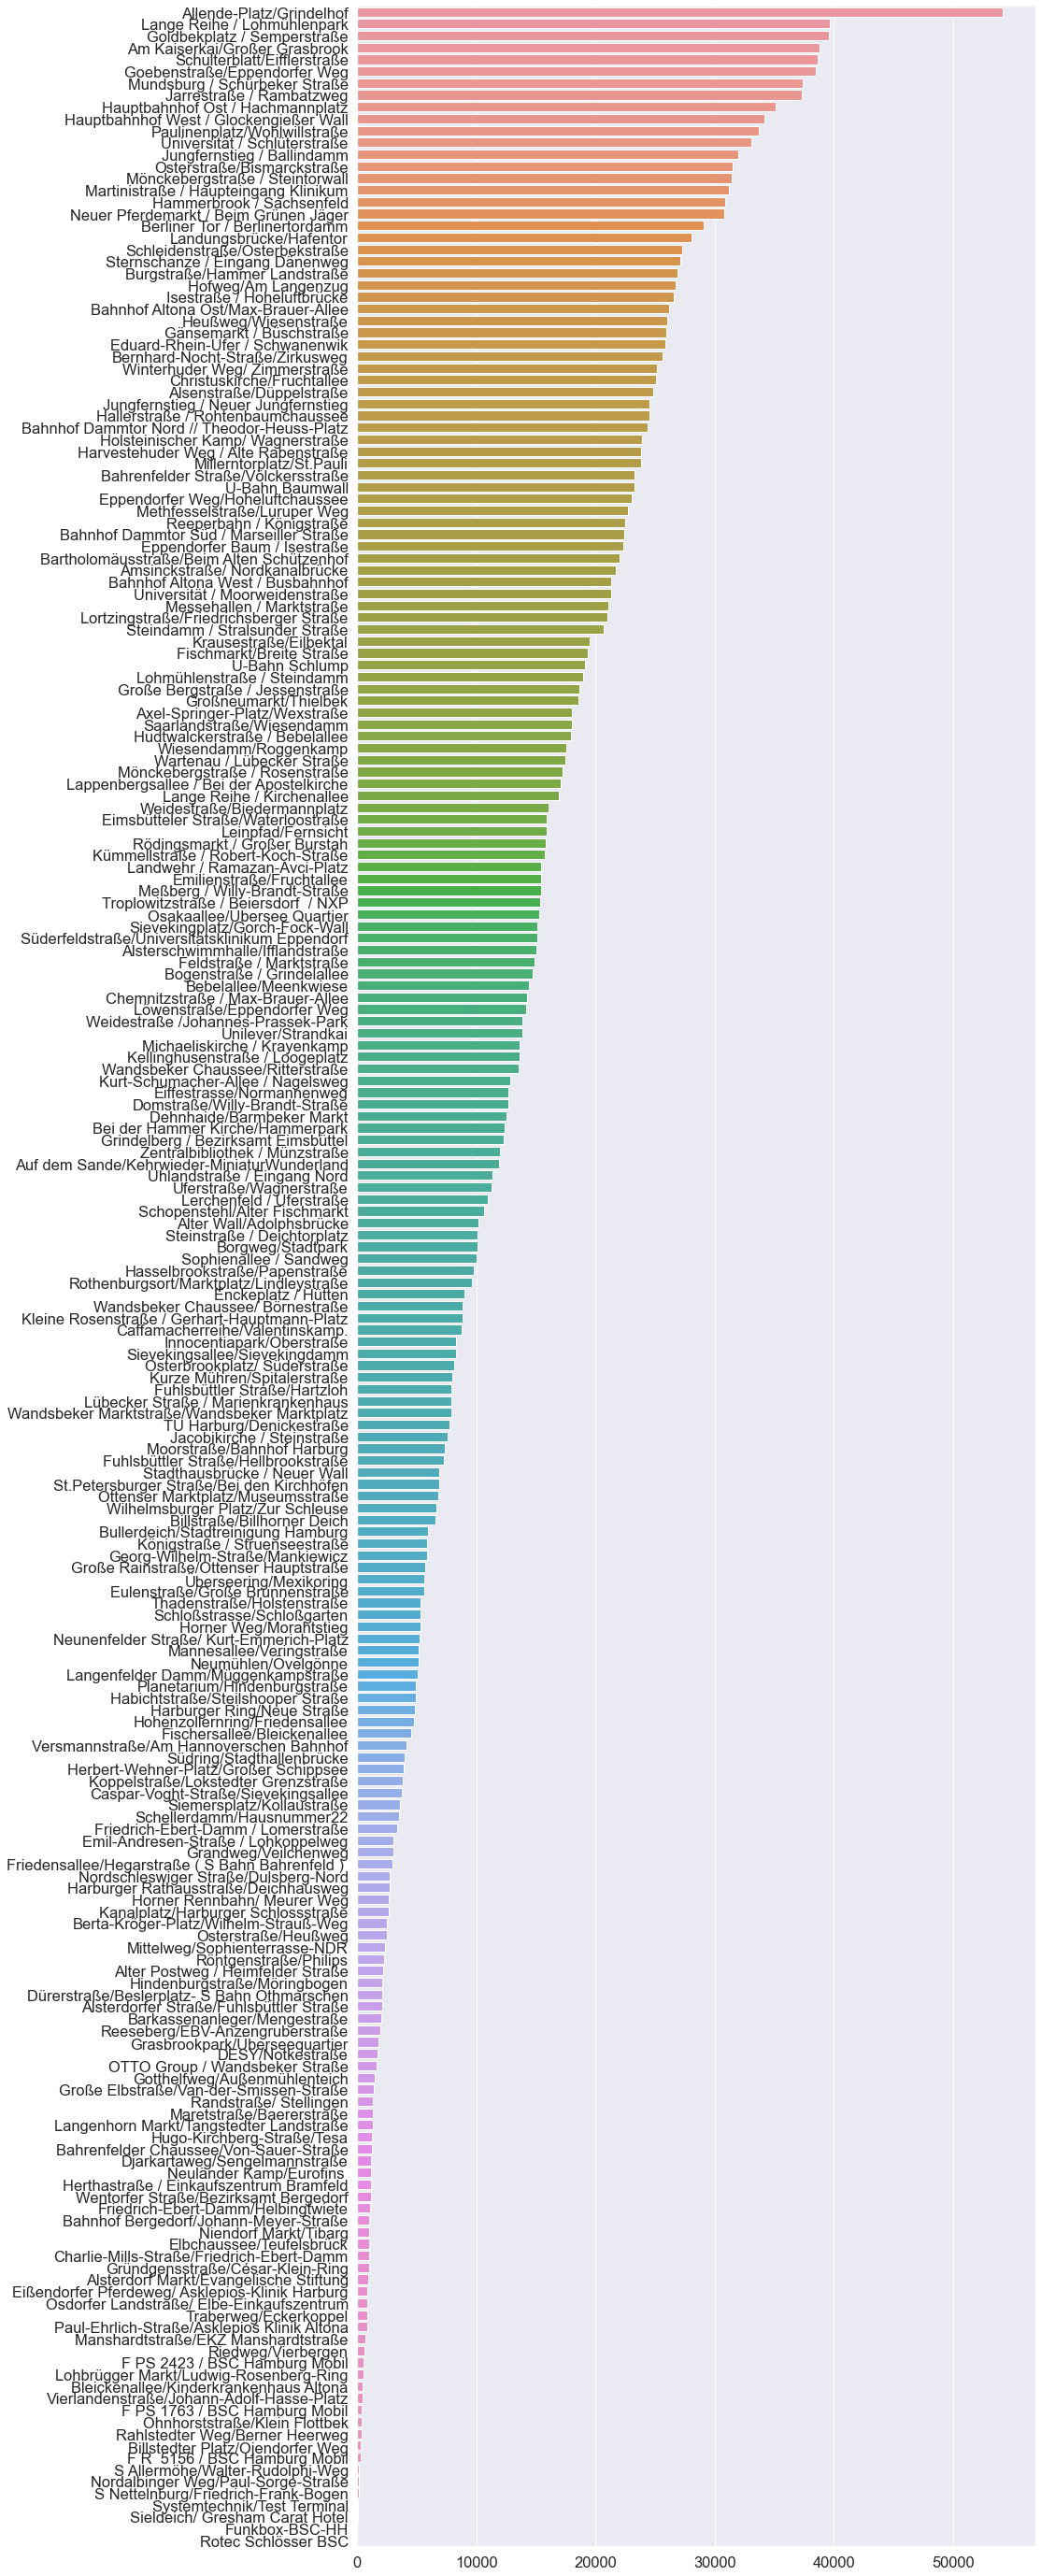

In [38]:
count = frequent_user_trips['from_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

<AxesSubplot:>

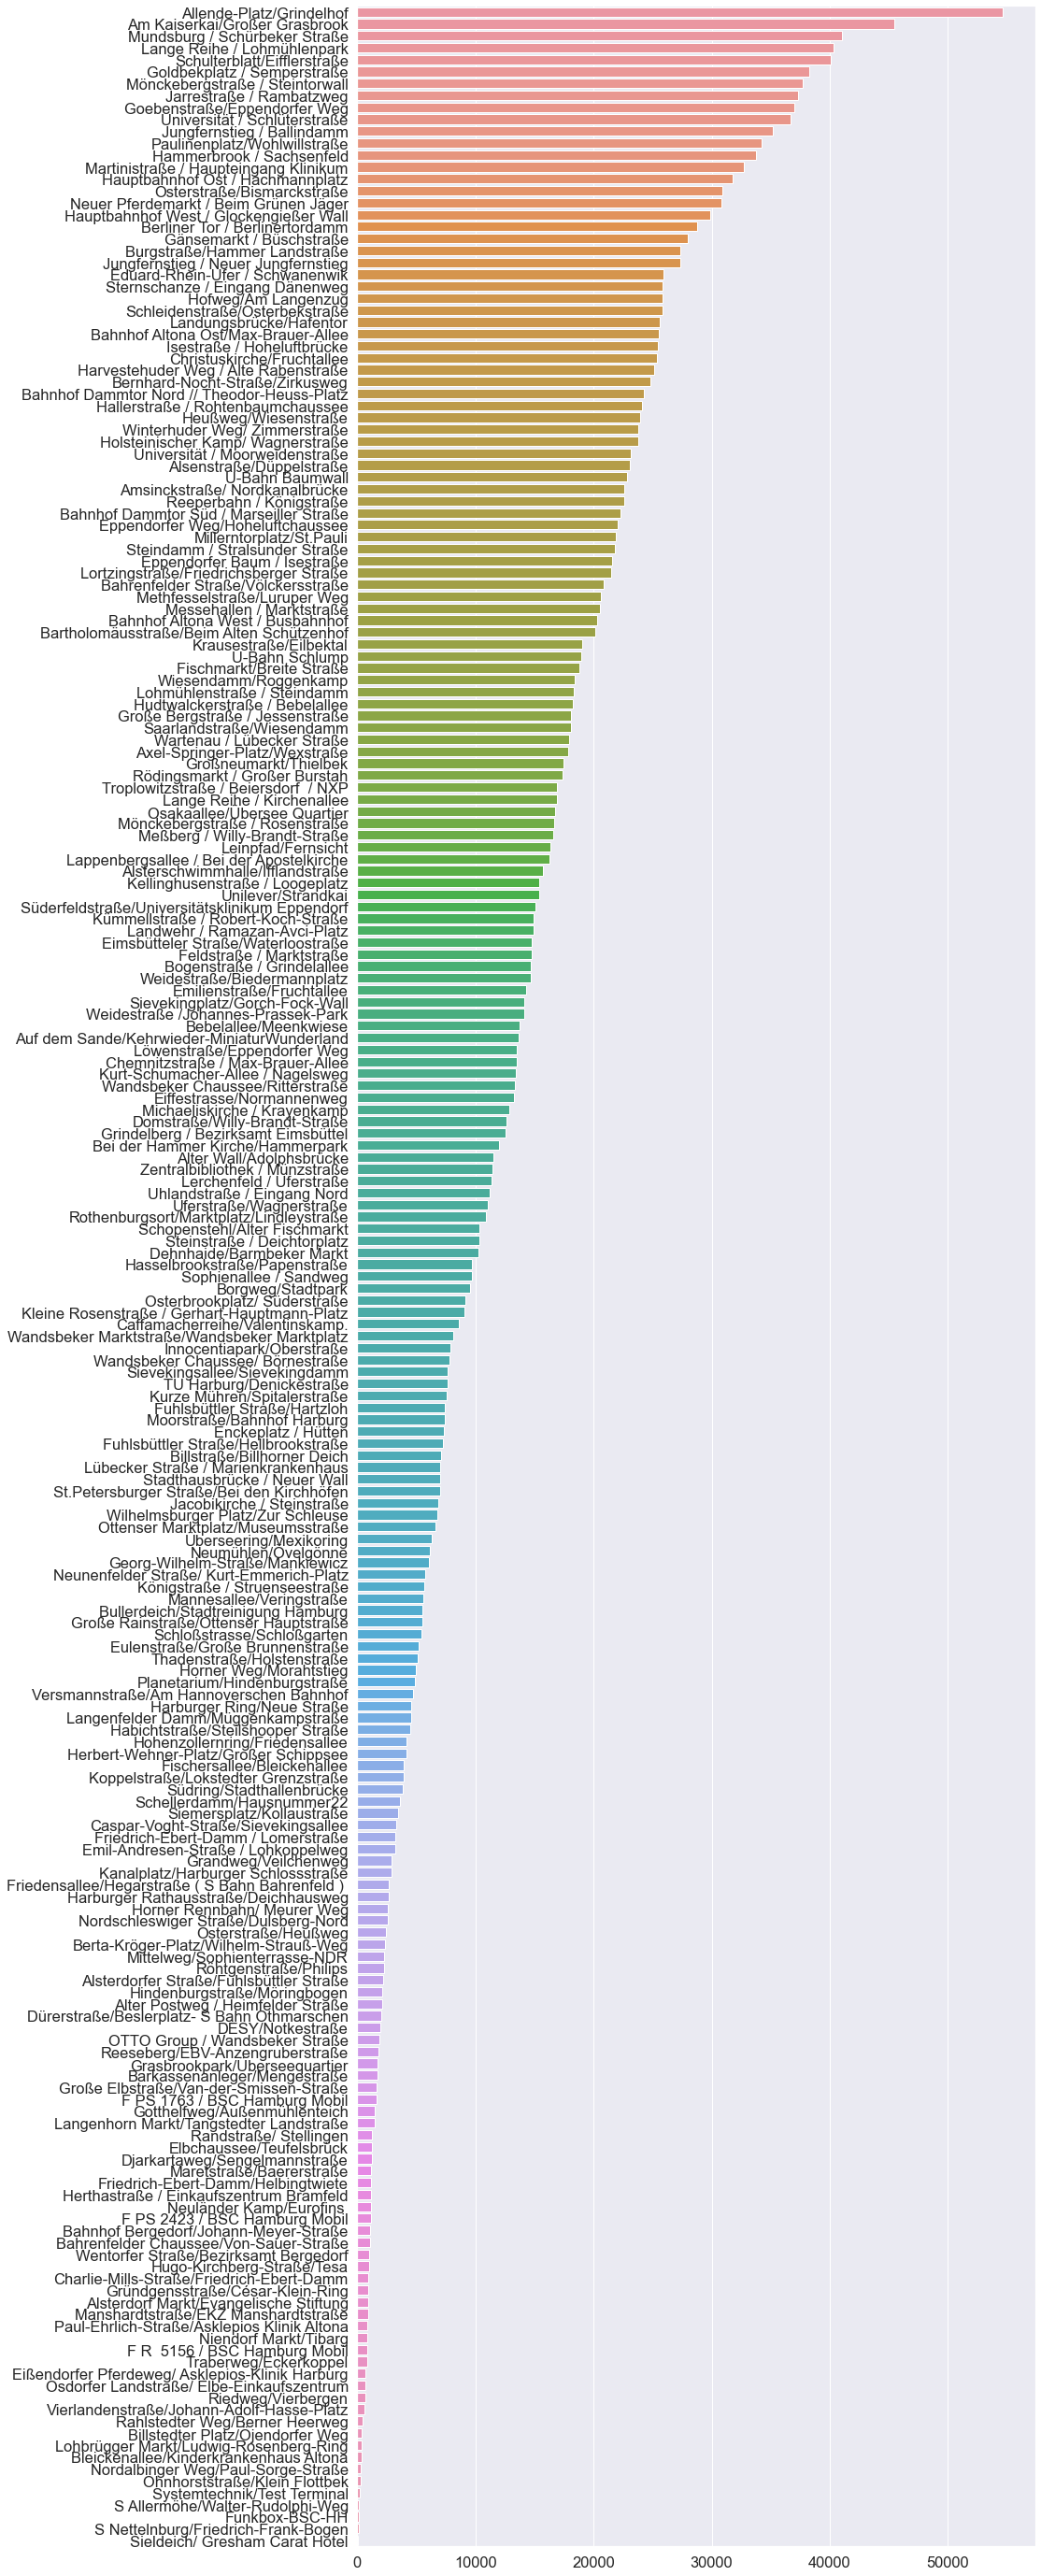

In [39]:
count = frequent_user_trips['to_station_name'].value_counts()
plt.figure(figsize=(13,50))
sns.barplot(x=count.values, y=count.index)

In [40]:
frequent_user_trips.groupby(['from_station_name', 'to_station_name']).size().sort_values(ascending=False).head(30)

from_station_name                               to_station_name                          
Bahrenfelder Straße/Völckersstraße              Bahnhof Altona West / Busbahnhof             8151
Saarlandstraße/Wiesendamm                       Schleidenstraße/Osterbekstraße               7797
Schleidenstraße/Osterbekstraße                  Saarlandstraße/Wiesendamm                    7428
Landungsbrücke/Hafentor                         Am Kaiserkai/Großer Grasbrook                6922
Meßberg / Willy-Brandt-Straße                   Am Kaiserkai/Großer Grasbrook                6491
U-Bahn Baumwall                                 Am Kaiserkai/Großer Grasbrook                5783
Bartholomäusstraße/Beim Alten Schützenhof       Mundsburg / Schürbeker Straße                5746
Am Kaiserkai/Großer Grasbrook                   Meßberg / Willy-Brandt-Straße                5729
Krausestraße/Eilbektal                          Lortzingstraße/Friedrichsberger Straße       5632
Am Kaiserkai/Großer Grasbroo

In [41]:
casual_user_trips.groupby(['from_station_name', 'to_station_name']).size().sort_values(ascending=False).head(30)

from_station_name                       to_station_name                       
Bahrenfelder Straße/Völckersstraße      Bahnhof Altona West / Busbahnhof          11367
Bahnhof Altona West / Busbahnhof        Bahrenfelder Straße/Völckersstraße        10443
Hallerstraße / Rohtenbaumchaussee       Universität / Schlüterstraße               7949
Saarlandstraße/Wiesendamm               Schleidenstraße/Osterbekstraße             7702
Mundsburg / Schürbeker Straße           Winterhuder Weg/ Zimmerstraße              7529
Winterhuder Weg/ Zimmerstraße           Mundsburg / Schürbeker Straße              7032
Allende-Platz/Grindelhof                Sternschanze / Eingang Dänenweg            6956
U-Bahn Baumwall                         Am Kaiserkai/Großer Grasbrook              6780
Mundsburg / Schürbeker Straße           Jarrestraße / Rambatzweg                   6765
Sternschanze / Eingang Dänenweg         Allende-Platz/Grindelhof                   6652
Wiesendamm/Roggenkamp                   J

In [42]:
station_count = pd.read_csv("../data/station_count.csv")
corr = station_count.corr()

<AxesSubplot:>

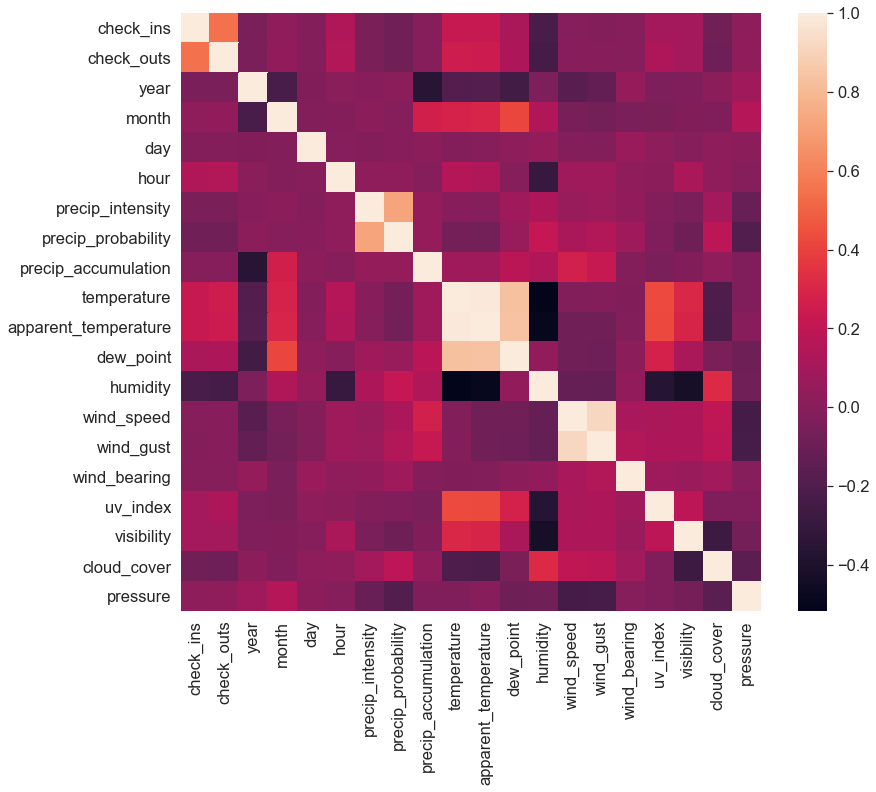

In [43]:
plt.figure(figsize=(13,11))
sns.heatmap(corr)